<a href="https://colab.research.google.com/github/wittyicon29/Apple-Disease-Detection-Using-CNN/blob/main/Apple_disease_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import glob as gb
import tensorflow as tf


In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/apple_disease_classification/Train"
TEST_DIR = "/content/drive/MyDrive/apple_disease_classification/Test"
BATCH_SIZE=64

In [ ]:
for folder in os.listdir(TRAINING_DIR):
    files = gb.glob(pathname= str(TRAINING_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 82 in folder Scab_Apple
For training data, found 114 in folder Rot_Apple
For training data, found 116 in folder Blotch_Apple
For training data, found 67 in folder Normal_Apple


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 30 in folder Blotch_Apple
For testing data, found 27 in folder Scab_Apple
For testing data, found 24 in folder Normal_Apple
For testing data, found 38 in folder Rot_Apple


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    
    target_folder = target_dir + target_class
    
  
    random_image = random.sample(os.listdir(target_folder),1)
    
   
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['Blotch_Apple','Normal_Apple','Rot_Apple','Scab_Apple']

Image shape (218, 231, 3)
Image shape (575, 767, 3)
Image shape (280, 390, 3)
Image shape (143, 144, 3)
Image shape (320, 450, 3)
Image shape (320, 304, 3)
Image shape (280, 393, 3)
Image shape (100, 100, 3)
Image shape (194, 259, 3)
Image shape (183, 275, 3)
Image shape (320, 344, 3)
Image shape (280, 327, 3)


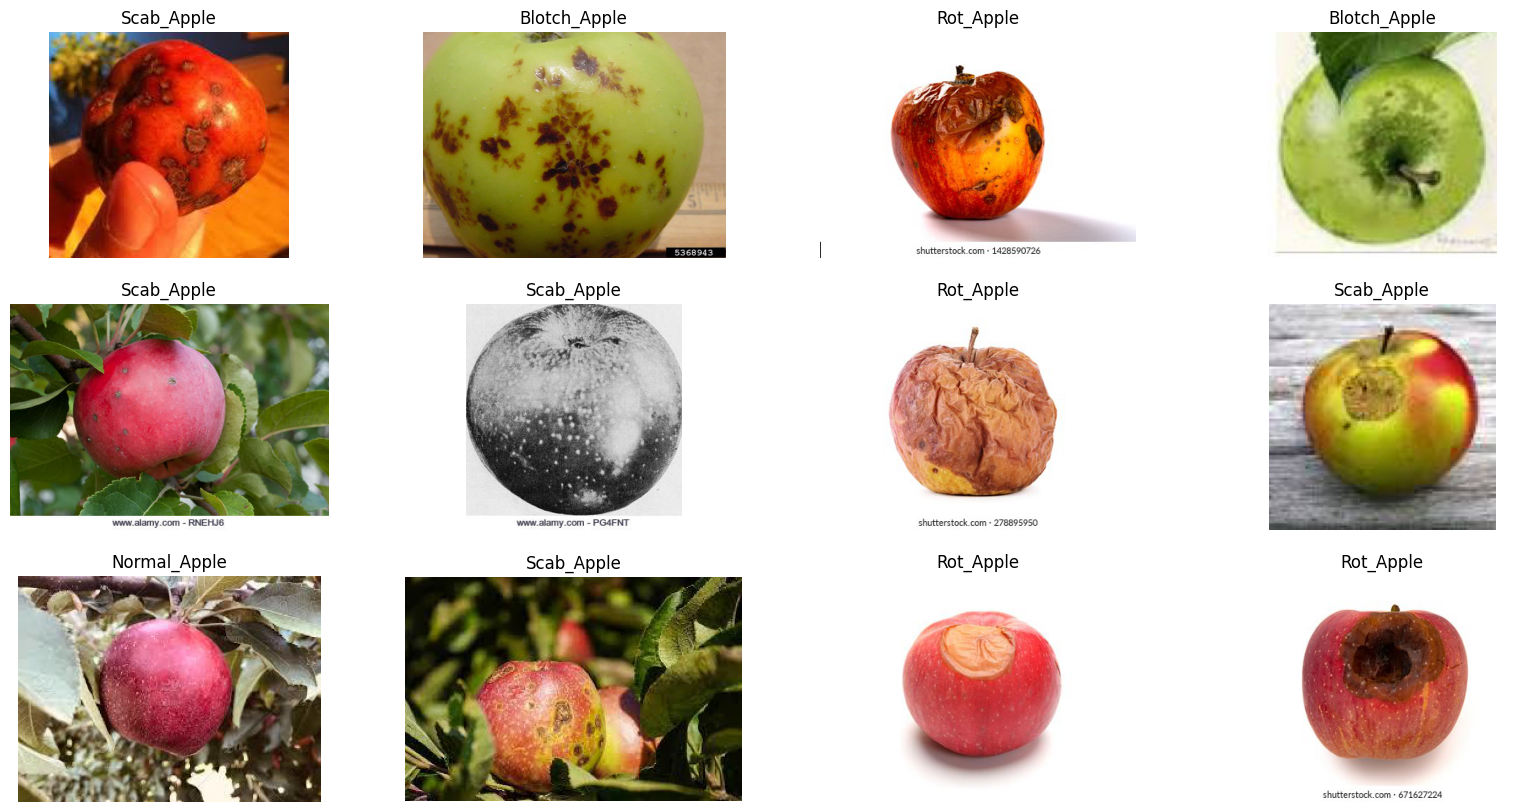

In [ ]:
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/apple_disease_classification/Train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def train_val_generators(TRAINING_DIR, TEST_DIR):
 
  train_datagen = ImageDataGenerator(rescale= 1.0/255.0,
                                     rotation_range= 45,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     fill_mode= 'nearest')

  
  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size= 20,
                                                      class_mode= 'categorical',
                                                      target_size=(224, 224))

 
  validation_datagen = ImageDataGenerator( rescale = 1.0/255.0 )

  
  validation_generator = validation_datagen.flow_from_directory(directory= TEST_DIR,
                                                                batch_size= 20,
                                                                class_mode= 'categorical',
                                                                target_size=(224, 224))
  
  return train_generator, validation_generator


In [ ]:
train_generator, test_generator = train_val_generators(TRAINING_DIR, TEST_DIR)

Found 382 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='weights.best.hdf5', monitor='val_loss', save_best_only=True)
history = model.fit(train_generator, validation_data=test_generator, epochs=150, steps_per_epoch=len(train_generator), validation_steps=len(test_generator), callbacks=[checkpoint])

Epoch 1/150
20/20 [==============================] - 23s 454ms/step - loss: 1.6063 - accuracy: 0.2984 - val_loss: 1.3519 - val_accuracy: 0.4167
Epoch 2/150
20/20 [==============================] - 9s 471ms/step - loss: 1.3741 - accuracy: 0.3089 - val_loss: 1.3689 - val_accuracy: 0.2500
Epoch 3/150
20/20 [==============================] - 7s 363ms/step - loss: 1.3564 - accuracy: 0.3796 - val_loss: 1.7250 - val_accuracy: 0.2500
Epoch 4/150
20/20 [==============================] - 9s 432ms/step - loss: 1.3318 - accuracy: 0.4215 - val_loss: 1.1956 - val_accuracy: 0.3833
Epoch 5/150
20/20 [==============================] - 7s 365ms/step - loss: 1.1580 - accuracy: 0.5052 - val_loss: 1.0532 - val_accuracy: 0.5000
Epoch 6/150
20/20 [==============================] - 9s 464ms/step - loss: 1.0727 - accuracy: 0.5681 - val_loss: 1.1215 - val_accuracy: 0.5167
Epoch 7/150
20/20 [==============================] - 9s 430ms/step - loss: 1.0826 - accuracy: 0.5785 - val_loss: 1.2021 - val_accuracy: 0.475

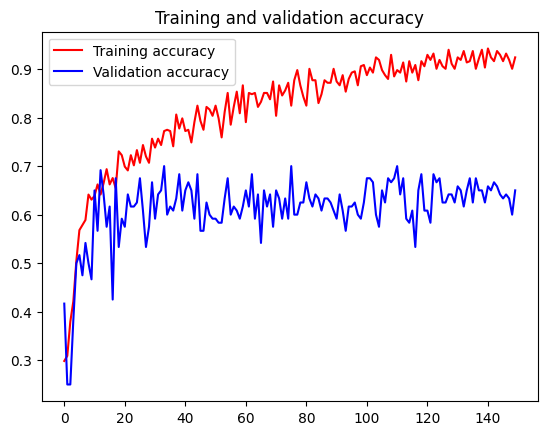

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
train_generator.class_indices

{'Blotch_Apple': 0, 'Normal_Apple': 1, 'Rot_Apple': 2, 'Scab_Apple': 3}

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)


Saving download.jpeg to download (6).jpeg
1/1 [==============================] - 0s 88ms/step
download.jpeg
[[0. 1. 0. 0.]]
